# 第十四课 计算机视觉基础

这节课我们会讲解计算机视觉

早在课程很早的时候，我们就体验过一个摄像头的例子，让我们来复习一下这个例子。

```
请帮我实现一个opencv摄像头调用的例子

并且渲染的图像要左右镜像
```

In [1]:
import cv2

# 初始化摄像头
cap = cv2.VideoCapture(0)

while True:
    # 从摄像头读取一帧
    ret, frame = cap.read()

    if not ret:
        print("无法捕获图像")
        break

    # 对图像进行左右镜像
    mirrored_frame = cv2.flip(frame, 1)

    # 显示镜像后的图像
    cv2.imshow('Mirrored Camera', mirrored_frame)

    # 按 'q' 键退出循环
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 释放摄像头资源
cap.release()
# 关闭所有OpenCV窗口
cv2.destroyAllWindows()


当然，对于大多数同学来说，在一个While循环里面去处理图像太复杂了

这里老师提前写好了一个capture_frame函数，在src文件夹中，我们可以直接载入这个函数

In [1]:
from src.capture_frame import capture_frame

frame = capture_frame()

print(frame.shape)

(480, 640, 3)


这里我们可以看到frame直接返回了一个numpy的图片对象，这个图片是480*640的，接下来我们在capture_frame中准备了一个display_frame_in_notebook函数，这个函数可以直接在notebook中显示图片，我们直接调用这个函数

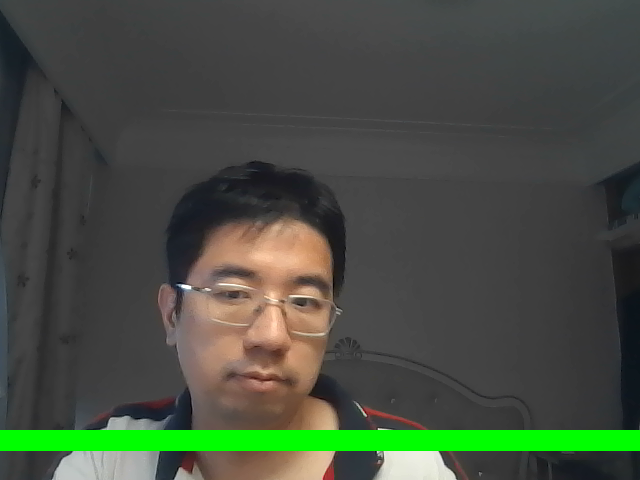

In [2]:
from src.capture_frame import display_frame_in_notebook

display_frame_in_notebook(frame)

可以看到，我们的capture_frame函数成功调用了摄像头，接下来我们就可以处理这个frame了。

至于这个capture_frame是怎么实现的，我们是通过下面的prompt来实现的

## capture_frame

```
我希望实现一个capture_frame() 函数


这个函数会打开一个摄像头，在摄像头上显示左右镜像过的画面

同时，在frame上回渲染一个进度条，进度条随着时间会从左到右运行，总共10秒

10秒后会记录frame，release掉camera对象，并且return记录下来的frame
```

## display_frame_in_notebook( frame )函数

```
为我实现一个display_frame_in_notebook( frame )函数

接受一个opencv camera获取到的frame，展示到notebook中
```

我们可以去检测这个frame中有没有人脸。

```
from src.capture_frame import capture_frame

frame = capture_frame()

from src.capture_frame import display_frame_in_notebook

display_frame_in_notebook(frame)

这段代码可以顺利运行

frame中已经存储了(480, 640, 3)的图片

我希望进一步使用opencv的人脸检测功能

判断这里面是不是有人脸，人脸的话

在人脸位置渲染绿色的正方形方框

存储到display_frame中并用display_frame_in_notebook显示
```

In [5]:
import cv2
from src.capture_frame import capture_frame, display_frame_in_notebook

# 捕获帧
frame = capture_frame()

# 加载OpenCV的预训练人脸检测模型
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# 将图片转换为灰度图，因为人脸检测通常在灰度图上进行
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# 检测灰度图中的人脸
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# 在人脸位置绘制绿色正方形方框
for (x, y, w, h) in faces:
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

# 将结果存储到display_frame中
display_frame = frame

# 在笔记本中显示结果
display_frame_in_notebook(display_frame)


Error: Could not open camera.


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


这里我们可以逐行看一下每一句代码都起到了什么作用

为了防止ChatGPT受到之前的代码影响，我们在ChatGPT新建一个窗口输入

```
请帮我实现一个opencv摄像头调用的例子

并且渲染的图像要左右镜像

同时调用opencv的人脸检测，如果检测到人脸则用绿色的正方形方框框住人脸
```

In [ ]:
import cv2

# 加载人脸检测的预训练模型
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# 初始化摄像头
cap = cv2.VideoCapture(0)

while True:
    # 读取一帧
    ret, frame = cap.read()
    
    # 如果读取帧失败，则退出循环
    if not ret:
        break
    
    # 进行左右镜像
    frame = cv2.flip(frame, 1)
    
    # 将图像转换为灰度图，以便进行人脸检测
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # 检测人脸
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    # 在检测到的人脸周围画绿色的正方形框
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # 显示结果
    cv2.imshow('Camera', frame)
    
    # 按 'q' 键退出循环
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 释放摄像头资源
cap.release()
# 关闭所有OpenCV窗口
cv2.destroyAllWindows()


这里我们特别指定使用opencv来进行检测

在青少年科创中，有另外一个库mediapipe也很经常会被使用到

让我们简单修改这段需求


请帮我实现一个摄像头调用的例子

并且渲染的图像要左右镜像

同时调用mediapipe的人脸检测，如果检测到人脸则用绿色的正方形方框框住人脸

In [1]:
import cv2
import mediapipe as mp

# 初始化 Mediapipe 人脸检测模块
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# 初始化摄像头
cap = cv2.VideoCapture(0)

# 配置 Mediapipe 人脸检测模型
with mp_face_detection.FaceDetection(min_detection_confidence=0.5) as face_detection:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("无法读取摄像头数据")
            break

        # 镜像翻转图像
        frame = cv2.flip(frame, 1)

        # 转换为RGB图像用于Mediapipe处理
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_detection.process(rgb_frame)

        # 如果检测到人脸
        if results.detections:
            for detection in results.detections:
                # 获取人脸边界框
                bboxC = detection.location_data.relative_bounding_box
                ih, iw, _ = frame.shape
                x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)

                # 计算正方形的边长
                side_length = max(w, h)
                
                # 确保正方形在图像内
                x1 = max(x, 0)
                y1 = max(y, 0)
                x2 = min(x + side_length, iw)
                y2 = min(y + side_length, ih)

                # 绘制绿色正方形方框
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # 显示图像
        cv2.imshow('Camera Feed', frame)

        # 按下 'q' 键退出
        if cv2.waitKey(5) & 0xFF == ord('q'):
            break

# 释放摄像头资源
cap.release()
cv2.destroyAllWindows()


因为mediapipe是个更新的库，所以他的检测效果是显然地更好地。

除了做人脸检测，mediapipe还可以做全身地肢体检测或者手的检测

让我们来轻微修改这个需求

请帮我实现一个摄像头调用的例子

并且渲染的图像要左右镜像

同时调用mediapipe的手的检测，如果检测到手则用绿色的正方形方框框住手

In [2]:
import cv2
import mediapipe as mp

# 初始化MediaPipe手部模型
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False,
                       max_num_hands=2,
                       min_detection_confidence=0.5,
                       min_tracking_confidence=0.5)

# 获取绘图工具
mp_drawing = mp.solutions.drawing_utils

# 打开摄像头
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        continue

    # 左右翻转图像
    frame = cv2.flip(frame, 1)

    # 转换图像颜色空间从BGR到RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # 处理图像，检测手部
    results = hands.process(frame_rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # 绘制手部关键点
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # 可以根据需要绘制方框
            x_max = 0
            x_min = frame.shape[1]
            y_max = 0
            y_min = frame.shape[0]
            for lm in hand_landmarks.landmark:
                x, y = int(lm.x * frame.shape[1]), int(lm.y * frame.shape[0])
                if x > x_max:
                    x_max = x
                if x < x_min:
                    x_min = x
                if y > y_max:
                    y_max = y
                if y < y_min:
                    y_min = y
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    # 显示图像
    cv2.imshow('MediaPipe Hands with Mirror Image', frame)

    # 按'q'退出循环
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

# 释放资源
hands.close()
cap.release()
cv2.destroyAllWindows()


这里我们稍微做点更复杂的工作，比如我们想看到手的连续轨迹，要怎么做呢？

可以进一步让GPT做出修改

```
{复制上面的程序，或者继续刚才的连续对话}

我想计算出手的中心坐标，存储到变量hand_center_x和hand_center_y中

请为我修改
```


In [3]:
import cv2
import mediapipe as mp

# 初始化MediaPipe手部模型
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False,
                       max_num_hands=2,
                       min_detection_confidence=0.5,
                       min_tracking_confidence=0.5)

# 获取绘图工具
mp_drawing = mp.solutions.drawing_utils

# 打开摄像头
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        continue

    # 左右翻转图像
    frame = cv2.flip(frame, 1)

    # 转换图像颜色空间从BGR到RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # 处理图像，检测手部
    results = hands.process(frame_rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # 绘制手部关键点
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # 计算手部中心坐标
            x_sum = 0
            y_sum = 0
            count = 0
            for lm in hand_landmarks.landmark:
                x, y = lm.x * frame.shape[1], lm.y * frame.shape[0]
                x_sum += x
                y_sum += y
                count += 1
            if count > 0:
                hand_center_x = int(x_sum / count)
                hand_center_y = int(y_sum / count)
                # 在手的中心画一个小圆点
                cv2.circle(frame, (hand_center_x, hand_center_y), 10, (0, 255, 0), -1)

    # 显示图像
    cv2.imshow('MediaPipe Hands with Mirror Image', frame)

    # 按'q'退出循环
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

# 释放资源
hands.close()
cap.release()
cv2.destroyAllWindows()


这里我们再进行进一步的修改，可视化出手的轨迹

```
{复制上面的程序，或者继续刚才的连续对话}

我想绘制出手在最近100帧中的连续轨迹

新建一个双向队列来处理这个问题

在if count > 0:时
将计算得到的hand_center_x和hand_center_y放入这个队列

并且用绿色的线条在图片上渲染这个轨迹
```

In [2]:
import cv2
import mediapipe as mp
from collections import deque

# 初始化MediaPipe手部模型
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False,
                       max_num_hands=2,
                       min_detection_confidence=0.5,
                       min_tracking_confidence=0.5)

# 获取绘图工具
mp_drawing = mp.solutions.drawing_utils

# 创建双向队列存储最近100帧的手部中心坐标
hand_centers = deque(maxlen=100)

# 打开摄像头
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        continue

    # 左右翻转图像
    frame = cv2.flip(frame, 1)

    # 转换图像颜色空间从BGR到RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # 处理图像，检测手部
    results = hands.process(frame_rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # 绘制手部关键点
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # 计算手部中心坐标
            x_sum = 0
            y_sum = 0
            count = 0
            for lm in hand_landmarks.landmark:
                x, y = lm.x * frame.shape[1], lm.y * frame.shape[0]
                x_sum += x
                y_sum += y
                count += 1
            if count > 0:
                hand_center_x = int(x_sum / count)
                hand_center_y = int(y_sum / count)
                hand_centers.append((hand_center_x, hand_center_y))

                # 用绿色线条绘制轨迹
                for i in range(1, len(hand_centers)):
                    if hand_centers[i - 1] is None or hand_centers[i] is None:
                        continue
                    cv2.line(frame, hand_centers[i - 1], hand_centers[i], (0, 255, 0), 2)

    # 显示图像
    cv2.imshow('MediaPipe Hands with Moving Trajectory', frame)

    # 按'q'退出循环
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

# 释放资源
hands.close()
cap.release()
cv2.destroyAllWindows()


这里如果内容不够多的话补一个姿态采集的例子

我们注意到刚才手的检测的程序，是同时能够检测出手的骨骼点的

我们之前有个很受欢迎的课程例子是“姿态检测”

不过之前那个例子的数据都是老师提供的

现在有了ChatGPT，我们不如直接写一个自己的姿态检测的记录程序

---

{粘贴之前任意一个带手检测的程序}

这段程序可以正常运行，我希望修改这段程序

当按下任意非'q'键时，程序会在hand_record_data/hand_data.csv中(续写）记录手的所有关键点的坐标

同时第一列记录按键对应的具体字幕

同时把图片保存在hand_record_data/imgs中，命名规则为按键对应的具体字幕_时间戳.jpg



In [3]:
import cv2
import mediapipe as mp
import os
import csv
import time

# 初始化MediaPipe手部模型
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False,
                       max_num_hands=2,
                       min_detection_confidence=0.5,
                       min_tracking_confidence=0.5)

# 获取绘图工具
mp_drawing = mp.solutions.drawing_utils

# 打开摄像头
cap = cv2.VideoCapture(0)

# 确保存储目录存在
if not os.path.exists('hand_record_data/hand_data.csv'):
    os.makedirs('hand_record_data/imgs', exist_ok=True)
    with open('hand_record_data/hand_data.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        header = ['Key', 'Timestamp']
        for i in range(21):  # Assuming max 21 landmarks per hand
            header.extend([f'x{i}', f'y{i}', f'z{i}'])
        writer.writerow(header)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        continue

    # 左右翻转图像
    frame = cv2.flip(frame, 1)

    # 转换图像颜色空间从BGR到RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # 处理图像，检测手部
    results = hands.process(frame_rgb)

    # 绘制手部关键点
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # 显示图像
    cv2.imshow('MediaPipe Hands with Mirror Image', frame)

    # 检测按键输入
    key = cv2.waitKey(5)
    if key == ord('q'):
        break
    elif key != -1:  # 任意其他有效按键
        character = chr(key).lower()
        timestamp = int(time.time())
        image_name = f"{character}_{timestamp}.jpg"
        image_path = f"hand_record_data/imgs/{image_name}"
        cv2.imwrite(image_path, frame)  # 保存图像

        # 记录数据
        data = [character, timestamp]
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for lm in hand_landmarks.landmark:
                    data.extend([lm.x, lm.y, lm.z])
        # 保存到CSV文件
        with open('hand_record_data/hand_data.csv', 'a', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(data)

# 释放资源
hands.close()
cap.release()
cv2.destroyAllWindows()


## 课后练习

- 将手轨迹显示那个程序，改为一个横向的示波器显示

- 把手想象成太阳，渲染一个行星（用圆圈表示）一直围绕着太阳转。

- 用上面程序记录的数据，训练一个手势分类的模型。

